# 1회차

# Loading packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

# Loading data

In [54]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Data at first sight

데이터 설명의 일부입니다.
- 유사한 그룹에 속한 피처는 피처 이름(예: ind, reg, car, calc)처럼 지정됩니다.
- 피처 이름에는 binary 피처를 나타내는 postfix bin과 범주형 피처를 나타내는 cat이 포함됩니다.
- 이러한 피처가 아닐 경우 연속형 또는 순서형입니다.
- -1값은 결측치를 나타냅니다.
- target 칼럼은 클레임이 제기되었는지 여부를 나타냅니다.

이 모든 것을 확인하기 위해 첫 번째 행과 마지막 행을 간단히 살펴보겠습니다.

In [55]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [56]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


데이터에서 다음을 찾아볼 수 있습니다.
- binary 변수
- 값이 정수인 범주형 변수
- 정수 또는 소수의 변수
- -1의 결측값을 나타내는 변수
- target 변수와 ID 변수

데이터의 개수를 살펴보겠습니다.

In [57]:
train.shape

(595212, 59)

59개의 변수과 595,212개의 행이 있습니다.  중복값이 있는지 살펴보겠습니다.

In [58]:
train.drop_duplicates()
train.shape

(595212, 59)

중복 값은 없습니다. test 셋도 확인해보겠습니다.

In [59]:
test.shape

(892816, 58)

train 보다 열이 1개 적습니다. 이는 target 변수인 것으로 보입니다.

이제 변수들이 어떤 타입을 가지고 있는지 살펴보겠습니다.

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() 메서드로 타입이 정수형인지 실수형인지 알 수 있습니다. null값은 없습니다. 이는 결측치가 -1로 대체되었기 때문에 정상입니다.

# Metadata

데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 DataFrame에 저장합니다.

구체적으로 다음과 같이 저장할 수 있습니다.
- role: input, ID, target
- level: nominal, interval, ordinal, binary
- keep: True or False
- dtype: int, float, str

In [61]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
        
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [62]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


먼저 nominal 변수들을 추출해 보겠습니다.

In [63]:
meta[(meta.level=='nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

role과 level에 따른 변수의 수를 확인해 보겠습니다.

In [64]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# Descrictive statistics

우리가 만든 메타 파일로 기술 통계량을 계산할 변수를 선택할 수 있습니다.

##  Interval variables

In [65]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### reg 변수
- 오직 ps_reg_03 만 결측치를 가집니다.
- 각 변수마다 최대-최소값이 다릅니다. StandardScaler등을 이용해 스케일링을 할 수 있습니다. 

### car 변수
- ps_car_12 와 ps_car_14 가 결측치를 가집니다.
- 위와 마찬가지로 스케일링이 필요합니다.

### calc 변수
- 결측치는 없습니다.
- 최대값이 0.9인 것을 보면 비율과 관련 있어보입니다.
- 모든 calc 변수는 비슷한 분포를 가집니다.

__전반적으로__ 범위가 작은 것을 알 수 있습니다. 이미 log를 취하는 등의 조치가 취해졌을까요?

## Ordinal variables

In [66]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- ps_car_11 만 결측치를 가지고 있습니다.
- 각기 다른 범위를 가지고 있기 때문에 Scaling이 필요합니다.

## Binary variables

In [67]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 훈련 데이터의 target 값의 평균이 3.645% 로 매우 불균형적입니다.
- 평균으로부터 대부분의 변수에 대해 값이 0이라는 결론을 내릴 수 있습니다.

# Handling imbalanced classes
위에서 언급한 바와 같이 target=1 인 비율은 target=0 보다 훨씬 낮습니다. 따라서 정확도는 높을 수 있으나 실제로 추가적인 값이 필요할 수 있습니다. 이 문제를 해결하기 위한 두가지 전략은 다음과 같습니다.

- target=1로 오버샘플링합니다.
- target=0으로 언더셈플링합니다. 
훈련 셋이 상당히 크기 때문에 언더샘플링이 가능합니다.

In [68]:
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('target=0 언더샘플링 비율: {}'.format(undersampling_rate) )
print('언더샘플링 후 target=0의 수: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

target=0 언더샘플링 비율: 0.34043569687437886
언더샘플링 후 target=0의 수: 195246


In [85]:
print(idx_0, idx_1, undersampled_idx)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,     10,
            ...
            595202, 595203, 595204, 595205, 595206, 595207, 595208, 595209,
            595210, 595211],
           dtype='int64', length=573518) Int64Index([     9,     19,     28,     39,     41,     65,     87,    108,
               191,    224,
            ...
            594968, 594975, 594980, 594982, 594985, 595006, 595046, 595099,
            595113, 595158],
           dtype='int64', length=21694) Int64Index([141652, 338484, 579616, 333839, 174512,  20344,  58123,  27384,
            575538,  51548,
            ...
            538107,  25459, 255379, 369043, 215496, 449967, 145188, 484849,
            192795, 385495],
           dtype='int64', length=195246)


# Data Quality Checks

## Checking missing values

In [69]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        print('변수 {}은 {}개({:.2%})의 결측치를 가짐'.format(f, missings, missings_perc))
        
print('총 {}개의 변수가 결측치를 가짐'.format(len(vars_with_missing)))

변수 ps_ind_02_cat은 103개(0.05%)의 결측치를 가짐
변수 ps_ind_04_cat은 51개(0.02%)의 결측치를 가짐
변수 ps_ind_05_cat은 2256개(1.04%)의 결측치를 가짐
변수 ps_reg_03은 38580개(17.78%)의 결측치를 가짐
변수 ps_car_01_cat은 62개(0.03%)의 결측치를 가짐
변수 ps_car_02_cat은 2개(0.00%)의 결측치를 가짐
변수 ps_car_03_cat은 148367개(68.39%)의 결측치를 가짐
변수 ps_car_05_cat은 96026개(44.26%)의 결측치를 가짐
변수 ps_car_07_cat은 4431개(2.04%)의 결측치를 가짐
변수 ps_car_09_cat은 230개(0.11%)의 결측치를 가짐
변수 ps_car_11은 1개(0.00%)의 결측치를 가짐
변수 ps_car_14은 15726개(7.25%)의 결측치를 가짐
총 12개의 변수가 결측치를 가짐


- ps_car_03_cat과 ps_car_05_cat은 결측치가 너무 많으므로 피처를 제거하는게 좋아보입니다.
- 다른 범주형 변수들은 결측치를 제거하는게 좋겠습니다.
- ps_reg_03은 18%의 결측치를 가지고 있습니다. 연속형변수이므로 평균으로 대체하겠습니다.
- ps_car_11은 1개의 결측치를 가집니다. 최빈값으로 대체하겠습니다.
- ps_car_14은 약 7%의 결측치를 가집니다. 평균값으로 대체하겠습니다.

In [70]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()

## Checking the cardinality of the categorical variables

카디널리티는 변수의 여러 값을 나타냅니다. 나중에 범주형 변수에서 더미 변수를 만들기 때문에, 중복되지 않는 값이 얼마나 있는지 확인해야 합니다. 이 변수들은 많은 더미 변수를 낳기 때문에 다르게 다루어야 합니다.

In [73]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('변수 {}는 {}개의 다른 값을 가짐'.format(f, dist_values))

변수 ps_ind_02_cat는 5개의 다른 값을 가짐
변수 ps_ind_04_cat는 3개의 다른 값을 가짐
변수 ps_ind_05_cat는 8개의 다른 값을 가짐
변수 ps_car_01_cat는 13개의 다른 값을 가짐
변수 ps_car_02_cat는 3개의 다른 값을 가짐
변수 ps_car_04_cat는 10개의 다른 값을 가짐
변수 ps_car_06_cat는 18개의 다른 값을 가짐
변수 ps_car_07_cat는 3개의 다른 값을 가짐
변수 ps_car_08_cat는 2개의 다른 값을 가짐
변수 ps_car_09_cat는 6개의 다른 값을 가짐
변수 ps_car_10_cat는 3개의 다른 값을 가짐
변수 ps_car_11_cat는 104개의 다른 값을 가짐


ps_car_11_cat이 많은 결측치를 가집니다. 그렇지만 데이터수에 비하면 합리적입니다.

In [76]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    # Compute smoothing
    smoothing = 1 / (1+ np.exp(-(averages['count']-min_samples_leaf)/smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is target into account
    averages[target.name] = prior*(1-smoothing)+averages['mean']*smoothing
    averages.drop(['mean','count'], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name), averages.reset_index().rename(columns={'index':target.name, target.name:'average'}), on=trn_series.name, how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name), averages.reset_index().rename(columns={'index': target.name, target.name:'average'}), on=tst_series.name, how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [77]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], test['ps_car_11_cat'], target=train.target, min_samples_leaf=100, smoothing=10, noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Exploratory Data Visualization

## 범주형 변수
범주형 변수와 target=1인 비율을 살펴보겠습니다.

<ipython-input-80-bbd1487d0992>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

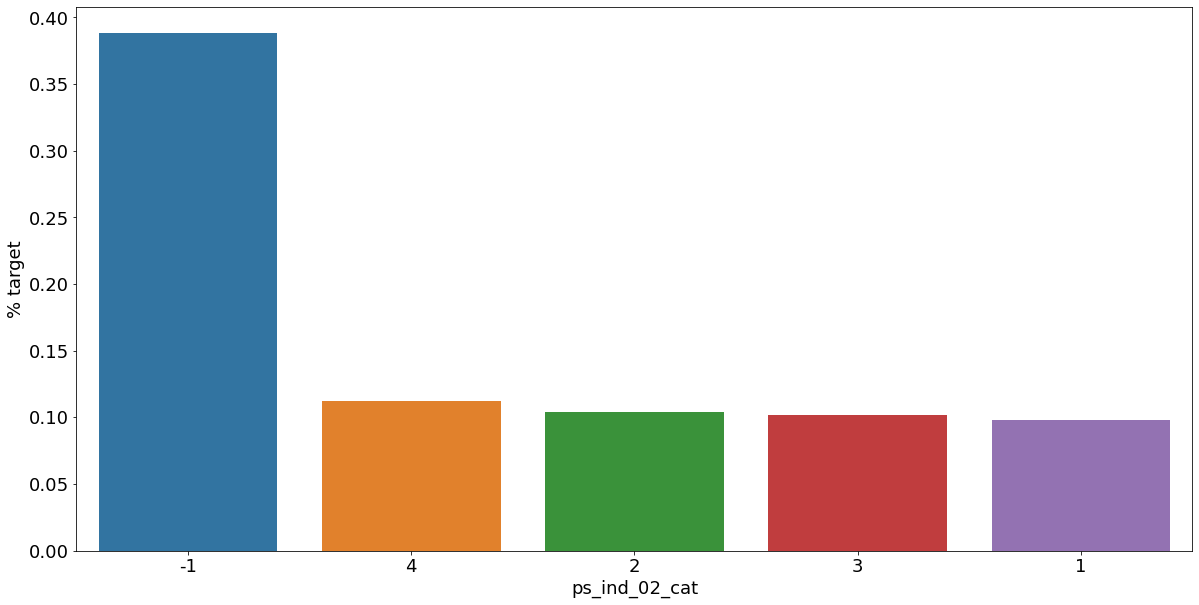

<Figure size 432x288 with 0 Axes>

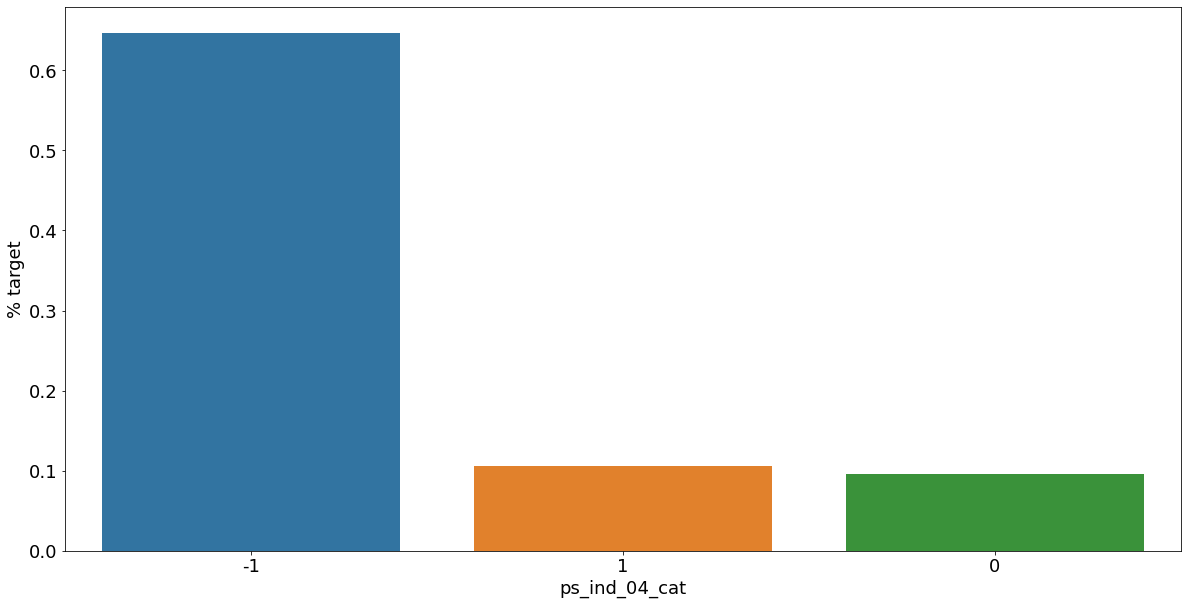

<Figure size 432x288 with 0 Axes>

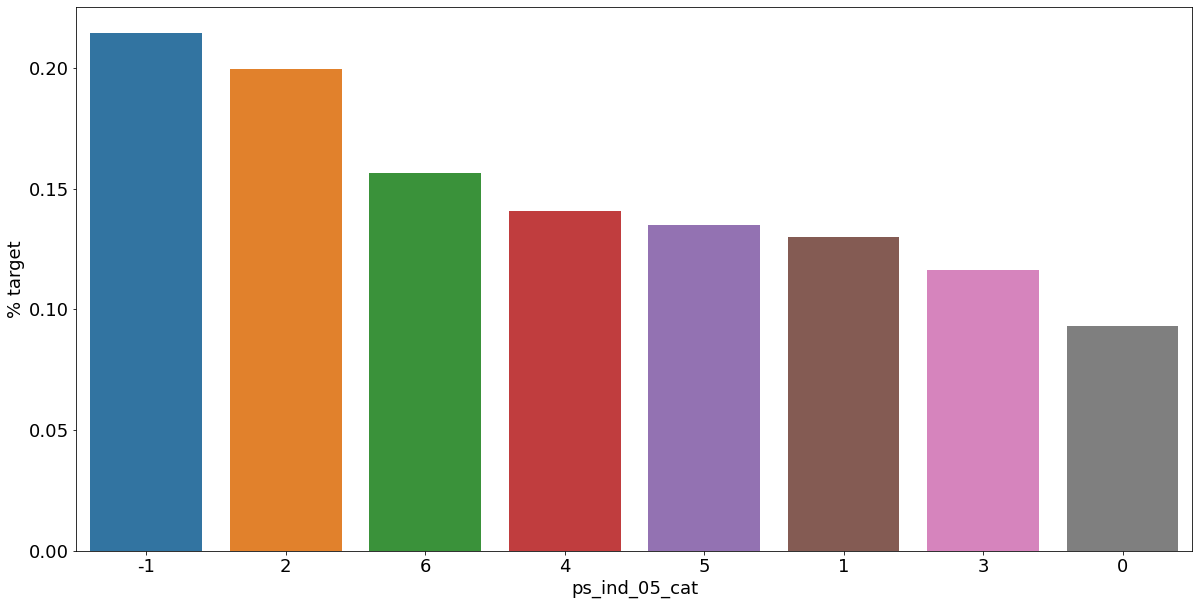

<Figure size 432x288 with 0 Axes>

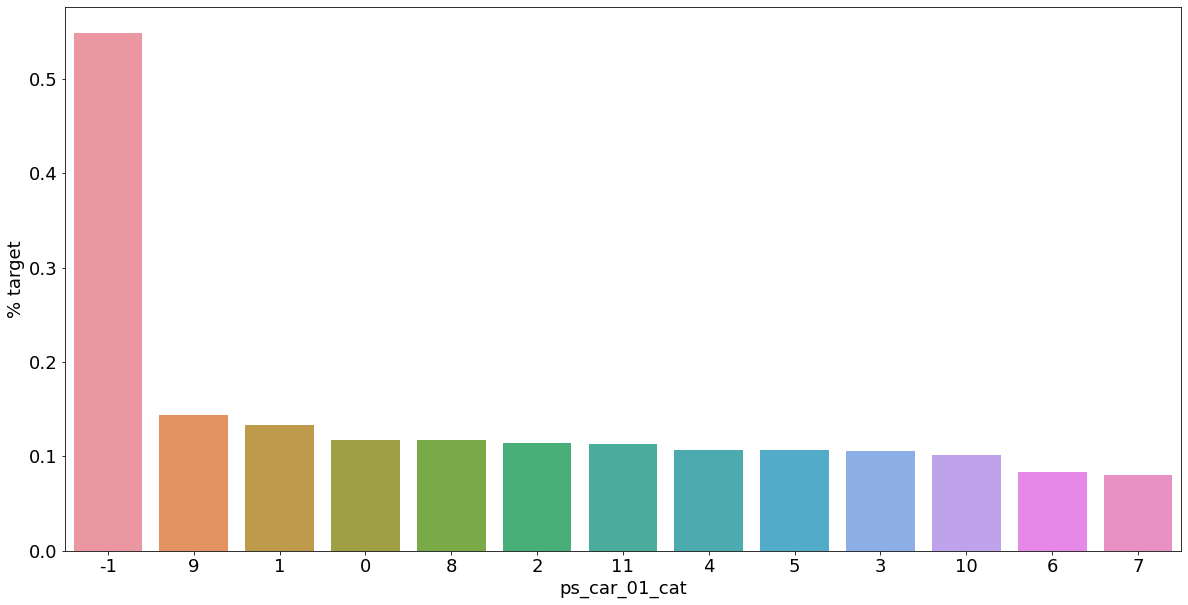

<Figure size 432x288 with 0 Axes>

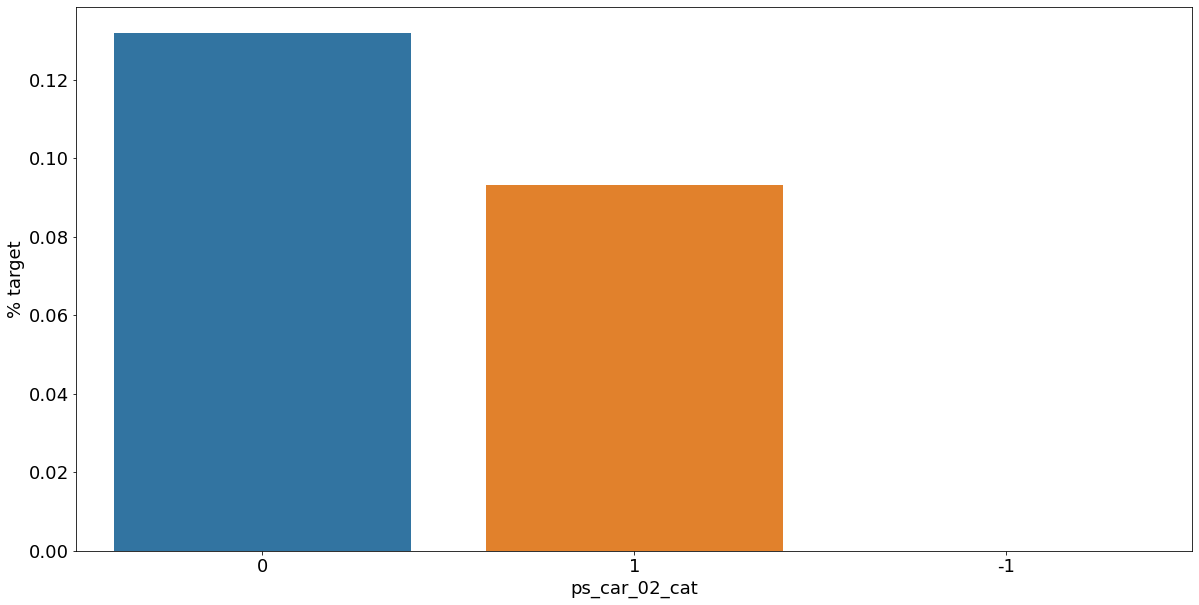

<Figure size 432x288 with 0 Axes>

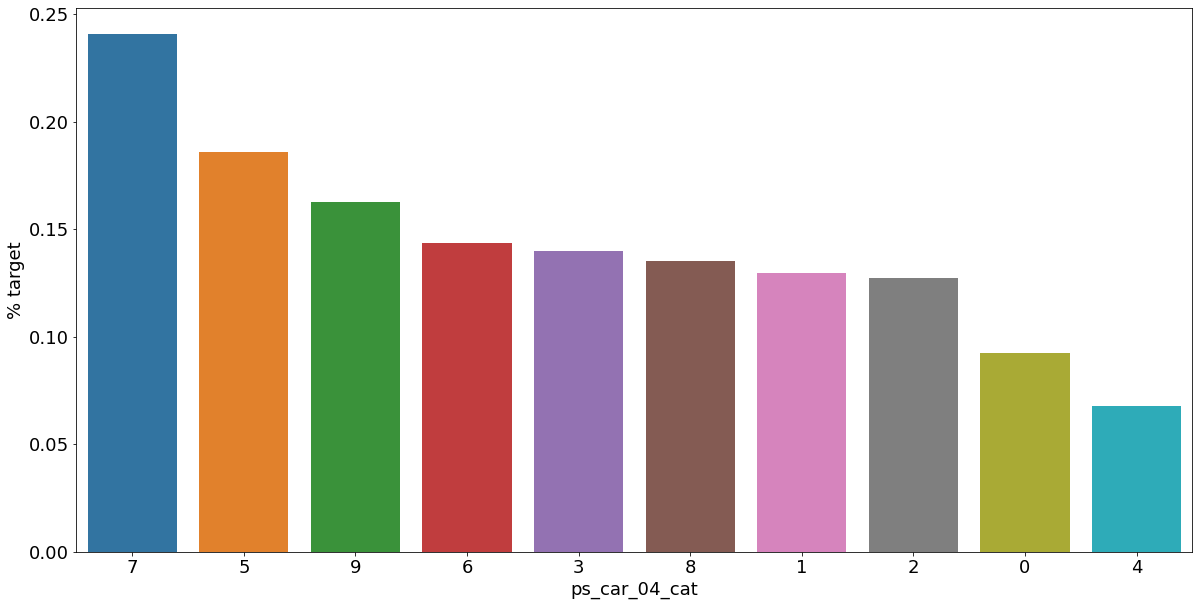

<Figure size 432x288 with 0 Axes>

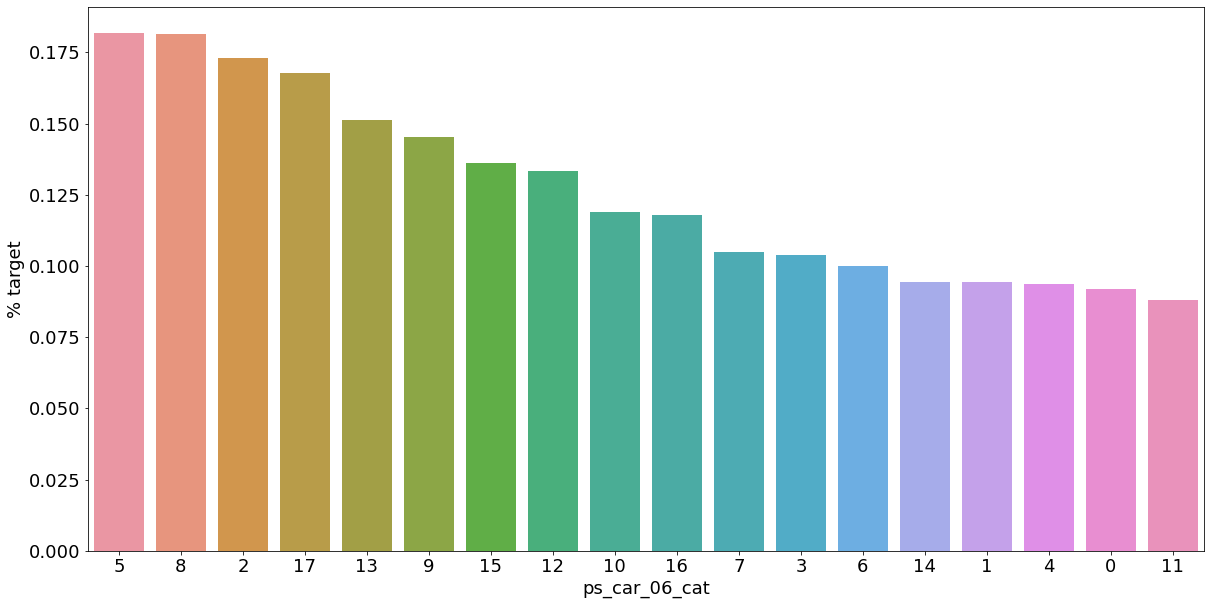

<Figure size 432x288 with 0 Axes>

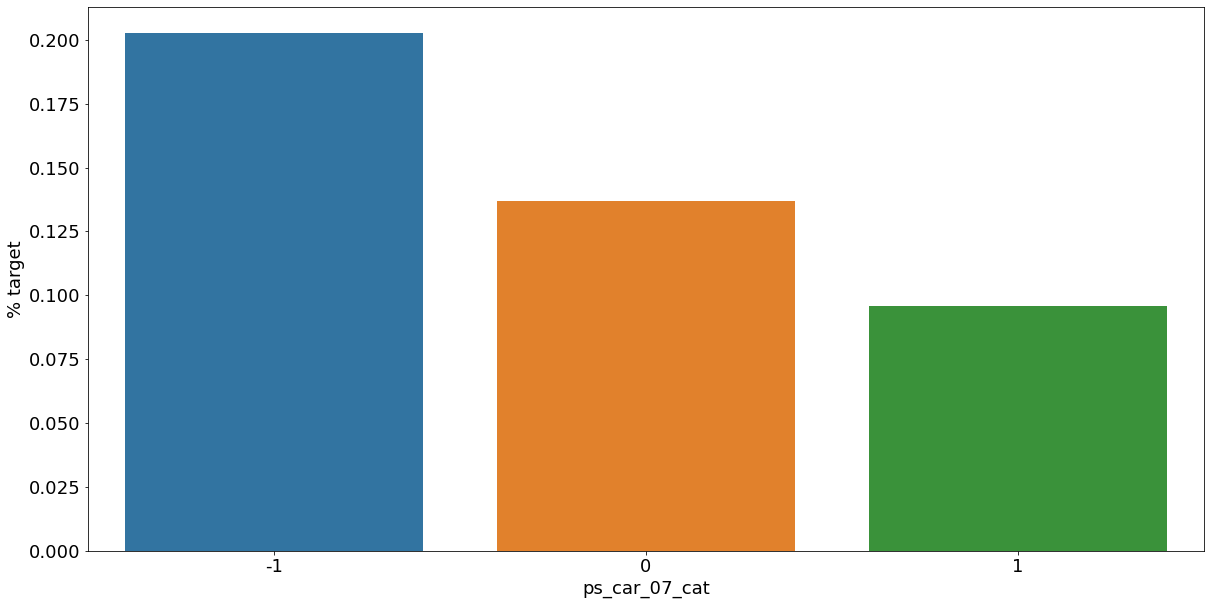

<Figure size 432x288 with 0 Axes>

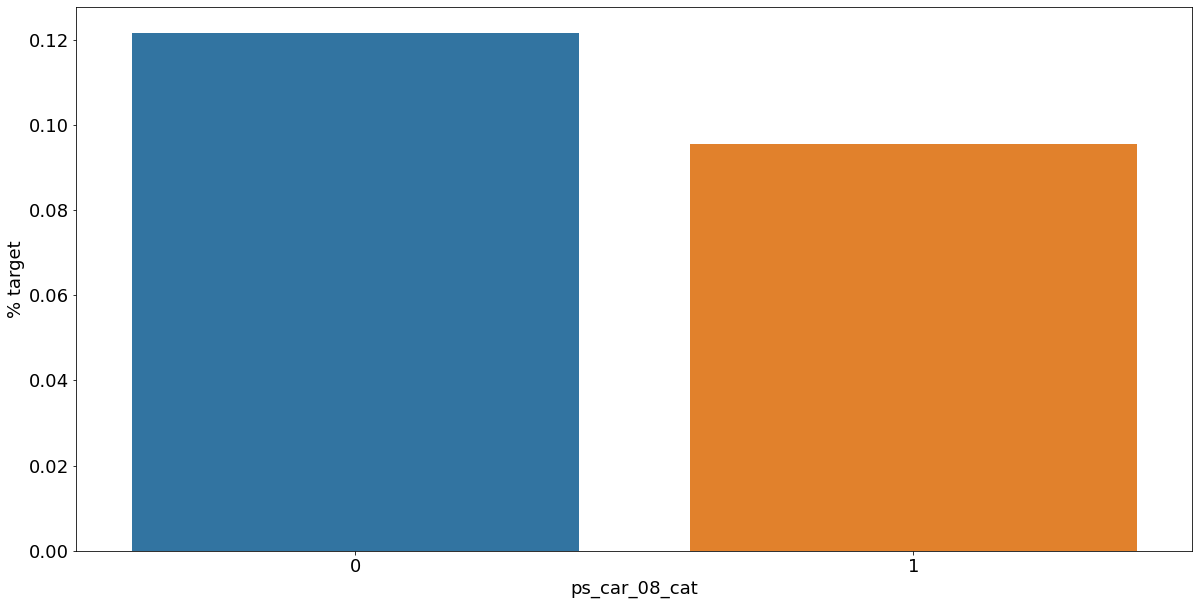

<Figure size 432x288 with 0 Axes>

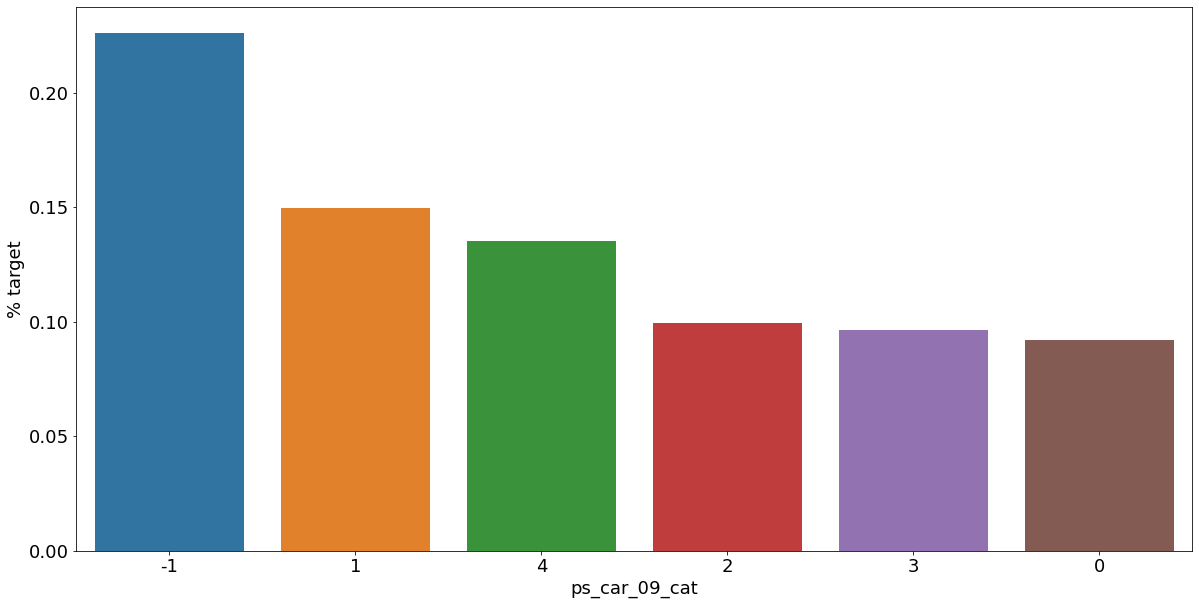

<Figure size 432x288 with 0 Axes>

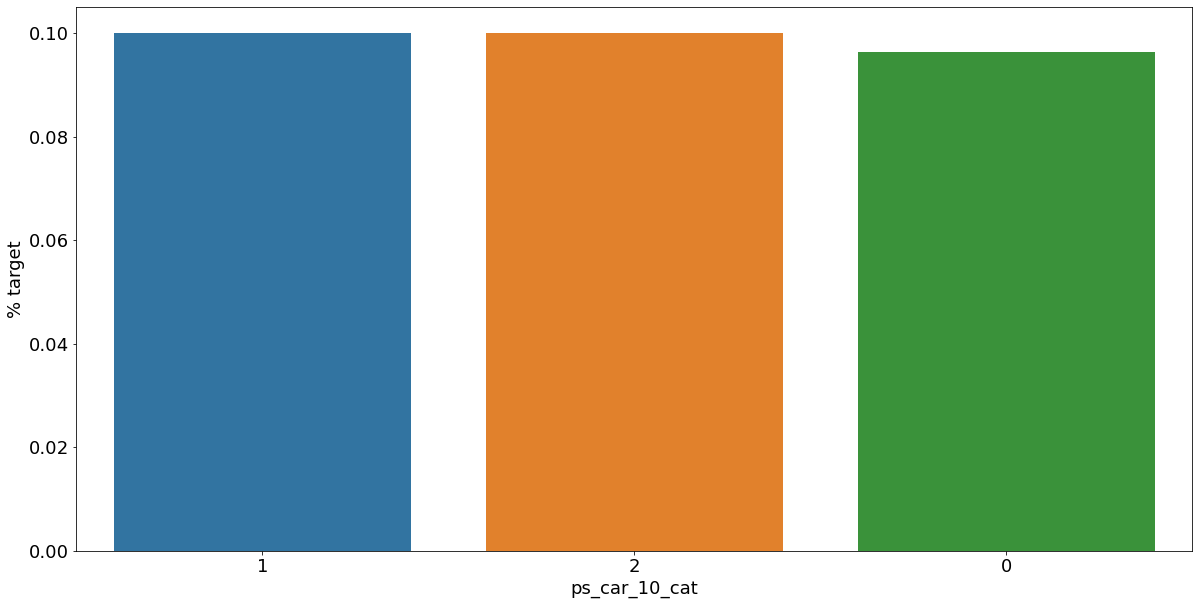

In [80]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar Plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

결측값이 있는 변수에서 다른 값으로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 결측값을 가진 고객은 보험금을 청구할 확률이 훨씬 높은 것 같습니다.

## 범위형 변수

범위형 변수간의 상관관계를 살펴보겠습니다.

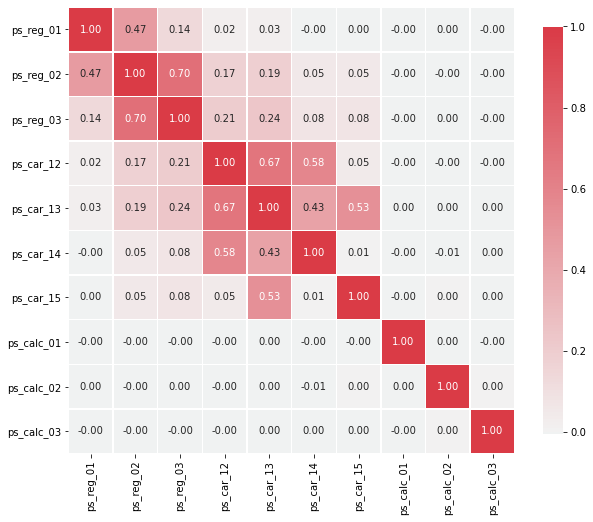

In [88]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show()
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

몇 변수간의 강한 상관관계가 있습니다.
- ps_reg_02, ps_reg_03(0.7)
- ps_car_12, ps_car_13(0.67)
- ps_car_12, ps_car_14(0.58)
- ps_car_13, ps_car_15(0.67)

속도를 향상시키기 위해 데이터의 샘플로 살펴보겠습니다.

In [90]:
s = train.sample(frac=0.1)

### ps_reg_02 and ps_reg_03

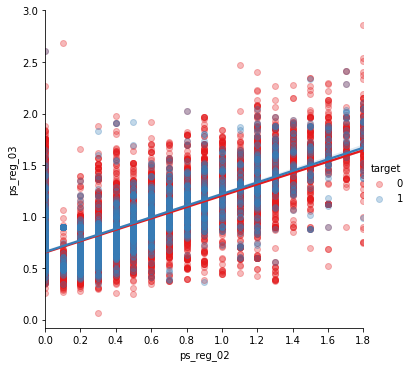

In [91]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})

### ps_car_12 and ps_car_13

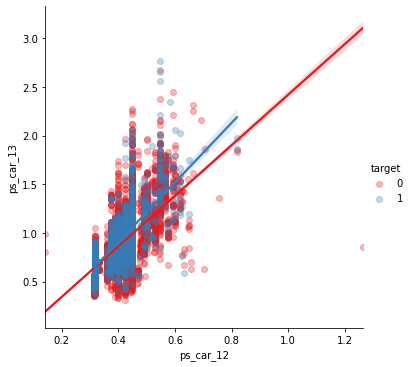

In [92]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})

### ps_car_12 and ps_car_14

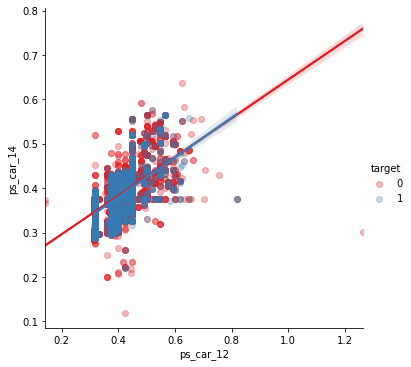

In [93]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})

### ps_car_13 and ps_car_15

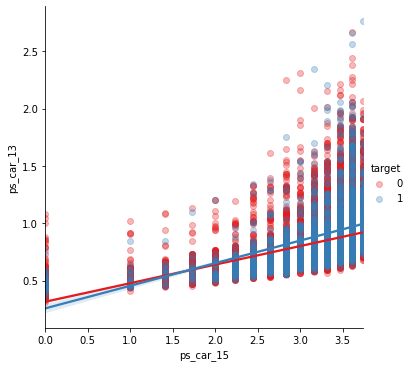

In [94]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})

변수에 대한 주성분 분석을 수행하여 차원 축소를 진행할 수도 있으나, 

상관 변수의 수가 적기 때문에 모델을 그대로 들고 진행하겠습니다.

### Checking the correlations between ordinal variables

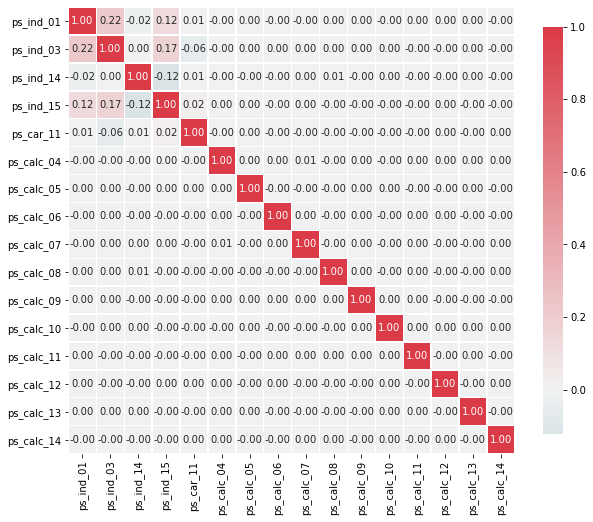

In [95]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수에서는 그다지 상관관계가 보이지 않습니다. 

# Feature engineering

## Creating dummy variables

범주형 변수를 다루기 위해 더미 변수를 생성하겠습니다.

In [96]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('더미화 전 변수의 개수: {}'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('더미화 후 변수의 개수: {}'.format(train.shape[1]))

더미화 전 변수의 개수: 57
더미화 후 변수의 개수: 109


52 개의 더미변수가 생성되었습니다. 

## Creating interaction variables

In [97]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) # Remove the original columns
# Concat the interaction variables to the train data
print('변환 전 변수의 개수: {}'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('변환 후 변수의 개수: {}'.format(train.shape[1]))

변환 전 변수의 개수: 109
변환 후 변수의 개수: 164


# Feature Selection

## Removing features low or zero variance

Sklearn을 이용해 분산이 1% 미만인 피처를 제거합니다.

In [99]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'],axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x: not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{}개의 변수가 1% 미만의 분산을 가짐'.format(len(v)))
print('해당 변수들:{}'.format(list(v)))

28개의 변수가 1% 미만의 분산을 가짐
해당 변수들:['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산에 따라 선택할 경우 변수가 많이 손실됩니다. 변수가 많지 않기 때문에 분류기를 통해 선택하도록 하겠습니다. 변수가 많을 경우 처리 시간을 줄일 수 있습니다.

Sklearn 에는 다른 피처 선택 방법도 제공됩니다. 다음 방법 중 하나는 분류기가 최적의 기능을 선택하고 이러한 기능을 계속하도록 하는 SelectFrom Model입니다.

## Selecting features with a RandomForest and SelectFromModel

랜덤 포레스트의 중요도에 따라 피처 선택을 하겠습니다. 그런 다음 SelectFromModel을 사용하여 유지할 변수의 개수를 지정할 수 있습니다. 피처 중요도 수준에 대한 임계값을 수동으로 설정할 수 있습니다만, 상위 50%의 최적 변수를 선택하기만 하면 됩니다.

In [100]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021233
 2) ps_car_13                      0.017382
 3) ps_car_13^2                    0.017215
 4) ps_car_12 ps_car_13            0.017211
 5) ps_car_13 ps_car_14            0.017150
 6) ps_reg_03 ps_car_13            0.017085
 7) ps_reg_01 ps_car_13            0.016836
 8) ps_car_13 ps_car_15            0.016774
 9) ps_reg_03 ps_car_14            0.016249
10) ps_reg_03 ps_car_12            0.015577
11) ps_reg_03 ps_car_15            0.015133
12) ps_car_14 ps_car_15            0.015092
13) ps_reg_01 ps_reg_03            0.014747
14) ps_car_13 ps_calc_01           0.014737
15) ps_car_13 ps_calc_02           0.014673
16) ps_car_13 ps_calc_03           0.014670
17) ps_reg_02 ps_car_13            0.014629
18) ps_reg_01 ps_car_14            0.014373
19) ps_reg_03                      0.014250
20) ps_reg_03^2                    0.014207
21) ps_reg_03 ps_calc_02           0.013818
22) ps_reg_03 ps_calc_03           0.013795
23) ps_reg_03 ps_calc_01        

SelectFromModel을 이용해 임계값을 정할 수 있습니다. get_support 방법을 사용하면 훈련 데이터의 변수 개수를 제한할 수 있습니다.

In [101]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('선택 전 피처 개수: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('선택 후 피처 개수: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

선택 전 피처 개수: 162
선택 후 피처 개수: 81


In [103]:
train = train[selected_vars + ['target']]

# Feature scaling

이전에 말했듯이 standard scaling을 사용하겠습니다.

In [104]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])